In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [84]:
train = pd.read_csv('employee_dataset/train.csv')
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [86]:
train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [87]:
train['Resource Allocation'].value_counts()
RA_mean = train['Resource Allocation'].mean()

In [88]:
train['Resource Allocation'].fillna(RA_mean,inplace=True)

In [89]:
train.isna().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   22750 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [90]:
train['Mental Fatigue Score'].value_counts()
MAS_mean = train['Mental Fatigue Score'].mean()


In [91]:
train['Mental Fatigue Score'].fillna(MAS_mean, inplace=True)

In [92]:
train['Burn Rate'].value_counts()
BR_mean = train['Burn Rate'].mean()

In [93]:
train['Burn Rate'].fillna(BR_mean, inplace=True)

In [94]:
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
lbl_binary = preprocessing.LabelBinarizer()

lbl_binary.fit(list(train['Gender'].values))
train['Gender'] = lbl_binary.transform(list(train['Gender'].values))

lbl_binary.fit(list(train['Company Type'].values))
train['Company Type'] = lbl_binary.transform(list(train['Company Type'].values))

lbl_binary.fit(list(train['WFH Setup Available'].values))
train['WFH Setup Available'] = lbl_binary.transform(list(train['WFH Setup Available'].values))

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  int32  
 3   Company Type          22750 non-null  int32  
 4   WFH Setup Available   22750 non-null  int32  
 5   Designation           22750 non-null  float64
 6   Resource Allocation   22750 non-null  float64
 7   Mental Fatigue Score  22750 non-null  float64
 8   Burn Rate             22750 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.3+ MB


In [96]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])
train['Join Month'] = train['Date of Joining'].dt.month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  int32         
 3   Company Type          22750 non-null  int32         
 4   WFH Setup Available   22750 non-null  int32         
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   22750 non-null  float64       
 7   Mental Fatigue Score  22750 non-null  float64       
 8   Burn Rate             22750 non-null  float64       
 9   Join Month            22750 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 1.5+ MB


<AxesSubplot:xlabel='Date of Joining', ylabel='Burn Rate'>

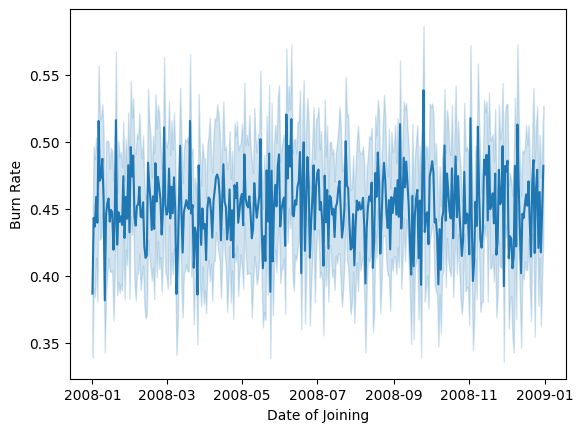

In [97]:
train.info()
sns.lineplot(x = 'Date of Joining', y = 'Burn Rate', data= train)

In [98]:
train['Join Year'] = train['Date of Joining'].dt.year
# train.info()
train_copy = train.copy()
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  int32         
 3   Company Type          22750 non-null  int32         
 4   WFH Setup Available   22750 non-null  int32         
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   22750 non-null  float64       
 7   Mental Fatigue Score  22750 non-null  float64       
 8   Burn Rate             22750 non-null  float64       
 9   Join Month            22750 non-null  int64         
 10  Join Year             22750 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), object(1)
memory usage: 1.6+ MB


In [99]:
train['Join Year'].value_counts()

2008    22750
Name: Join Year, dtype: int64

In [100]:
train.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Join Month,Join Year
Gender,1.000000,-0.009789,-0.073296,0.113295,0.138806,0.138735,0.151001,0.000302,NaN
Company Type,-0.009789,1.000000,0.005725,0.006095,0.005659,0.002532,0.004171,-0.000067,NaN
WFH Setup Available,-0.073296,0.005725,1.000000,-0.229720,-0.276284,-0.263429,-0.298599,-0.004144,NaN
Designation,0.113295,0.006095,-0.229720,1.000000,0.852046,0.656445,0.719284,-0.000952,NaN
Resource Allocation,0.138806,0.005659,-0.276284,0.852046,1.000000,0.739268,0.811062,-0.000086,NaN
Mental Fatigue Score,0.138735,0.002532,-0.263429,0.656445,0.739268,1.000000,0.878217,0.002116,NaN
Burn Rate,0.151001,0.004171,-0.298599,0.719284,0.811062,0.878217,1.000000,-0.001007,NaN
Join Month,0.000302,-0.000067,-0.004144,-0.000952,-0.000086,0.002116,-0.001007,1.000000,NaN
Join Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
train_copy = train_copy.drop('Employee ID',axis=1)
train_copy = train_copy.drop('Date of Joining',axis=1)
train_copy = train_copy.drop('Join Year',axis=1)


In [102]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                22750 non-null  int32  
 1   Company Type          22750 non-null  int32  
 2   WFH Setup Available   22750 non-null  int32  
 3   Designation           22750 non-null  float64
 4   Resource Allocation   22750 non-null  float64
 5   Mental Fatigue Score  22750 non-null  float64
 6   Burn Rate             22750 non-null  float64
 7   Join Month            22750 non-null  int64  
dtypes: float64(4), int32(3), int64(1)
memory usage: 1.1 MB


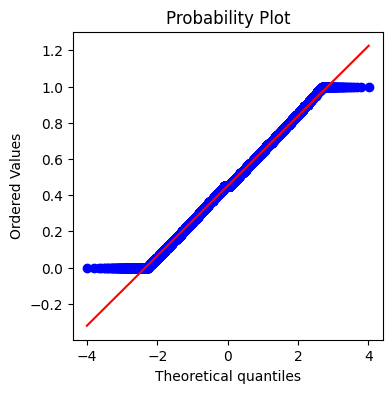

In [103]:
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(train_copy['Burn Rate'], plot=ax)
plt.show()


In [104]:
from sklearn.model_selection import train_test_split

y = train_copy['Burn Rate']
del train_copy['Burn Rate']

In [105]:
X = train_copy

x_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [107]:
reg = {
"LinearRegression": LinearRegression(),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1)
}

In [108]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in reg.items():
  
  model.fit(x_train, y_train)
  y_train_pre = model.predict(x_test)
  r2 = r2_score(y_test, y_train_pre)
  rmse  = np.sqrt(mean_squared_error(y_test, y_train_pre))
  print("--------------------------------------------------------------")
  print("Model:", name)
  print("-----Training Data Evalution-----")
  print("R2 Value: ", r2_score(y_test, y_train_pre))
  print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_train_pre)))
  dic["Model"].append(name)
  dic["R2_Train"].append(r2)
  dic["RMSE_Train"].append(rmse)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
R2 Value:  0.8343010003086916
RMSE:  0.07877334383677494
--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evalution-----
R2 Value:  0.7707555224907736
RMSE:  0.09265498263596031
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
R2 Value:  0.7546061103906789
RMSE:  0.09586304284326469
--------------------------------------------------------------
Model: Ridge
-----Training Data Evalution-----
R2 Value:  0.8343006826083613
RMSE:  0.07877341935414499
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
R2 Value:  -9.63328028014132e-07
RMSE:  0.19351718905173115
--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evalu

In [109]:
final_data = pd.DataFrame(dic)
final_data

,Model,R2_Train,RMSE_Train
0,LinearRegression,8.343010e-01,0.078773
1,KNeighborsRegressor,7.707555e-01,0.092655
2,AdaBoostRegressor,7.546061e-01,0.095863
3,Ridge,8.343007e-01,0.078773
4,ElasticNet,-9.633280e-07,0.193517
5,GradientBoostingRegressor,8.576811e-01,0.073005
6,DecisionTreeRegressor,7.294613e-01,0.100655
7,ExtraTreesRegressor,7.993769e-01,0.086678
8,RandomForestRegressor,8.309820e-01,0.079558
9,XGBRegressor,8.521230e-01,0.074417


In [110]:
final_data.sort_values('RMSE_Train',axis=0, ascending=True)

,Model,R2_Train,RMSE_Train
5,GradientBoostingRegressor,8.576811e-01,0.073005
9,XGBRegressor,8.521230e-01,0.074417
0,LinearRegression,8.343010e-01,0.078773
3,Ridge,8.343007e-01,0.078773
8,RandomForestRegressor,8.309820e-01,0.079558
7,ExtraTreesRegressor,7.993769e-01,0.086678
1,KNeighborsRegressor,7.707555e-01,0.092655
2,AdaBoostRegressor,7.546061e-01,0.095863
6,DecisionTreeRegressor,7.294613e-01,0.100655
4,ElasticNet,-9.633280e-07,0.193517


In [111]:
final_data['Score'] = final_data['R2_Train'] * 100
final_data

,Model,R2_Train,RMSE_Train,Score
0,LinearRegression,8.343010e-01,0.078773,83.430100
1,KNeighborsRegressor,7.707555e-01,0.092655,77.075552
2,AdaBoostRegressor,7.546061e-01,0.095863,75.460611
3,Ridge,8.343007e-01,0.078773,83.430068
4,ElasticNet,-9.633280e-07,0.193517,-0.000096
5,GradientBoostingRegressor,8.576811e-01,0.073005,85.768109
6,DecisionTreeRegressor,7.294613e-01,0.100655,72.946128
7,ExtraTreesRegressor,7.993769e-01,0.086678,79.937690
8,RandomForestRegressor,8.309820e-01,0.079558,83.098205
9,XGBRegressor,8.521230e-01,0.074417,85.212296


In [112]:
final_data.sort_values('Score',axis=0, ascending=True)

,Model,R2_Train,RMSE_Train,Score
4,ElasticNet,-9.633280e-07,0.193517,-0.000096
6,DecisionTreeRegressor,7.294613e-01,0.100655,72.946128
2,AdaBoostRegressor,7.546061e-01,0.095863,75.460611
1,KNeighborsRegressor,7.707555e-01,0.092655,77.075552
7,ExtraTreesRegressor,7.993769e-01,0.086678,79.937690
8,RandomForestRegressor,8.309820e-01,0.079558,83.098205
3,Ridge,8.343007e-01,0.078773,83.430068
0,LinearRegression,8.343010e-01,0.078773,83.430100
9,XGBRegressor,8.521230e-01,0.074417,85.212296
5,GradientBoostingRegressor,8.576811e-01,0.073005,85.768109
